### Data Preprocessing

In [1]:
# @title
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# @title
# Reading the dataset
import pandas as pd
import numpy as np

news_df = pd.read_csv('/content/drive/MyDrive/IE 7275/IE 7275 - Project/OnlineNewsPopularity.csv')
news_df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
# @title
import matplotlib.pyplot as plt

In [ ]:
# @title
# Retrieving the null values summary
null_summary = news_df.isna().sum()

for variable in null_summary.index:
  if(null_summary[variable] > 0):
    print(variable)

The dataset does not contain any null values so no null handling is needed.

In [ ]:
# @title
# Renaming column names to strip trailing spaces

news_df.columns = [column.strip() for column in news_df.columns ]
news_df.columns

Index(['url', 'timedelta', 'n_tokens_title', 'n_tokens_content',
       'n_unique_tokens', 'n_non_stop_words', 'n_non_stop_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
     

In [ ]:
news_df.describe()

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,354.530471,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,214.163767,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,164.000000,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,339.000000,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,542.000000,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,731.000000,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [ ]:
# @title
# Retrieving summary of the dataset

news_df.describe()['shares']

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [ ]:
# @title
# Dropping non-predictive columns
news_df.drop(columns=['url','timedelta'],inplace=True)

In [ ]:
news_df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [ ]:
# @title
# Checking the datatype of the data

news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 59 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   n_tokens_title                 39644 non-null  float64
 1   n_tokens_content               39644 non-null  float64
 2   n_unique_tokens                39644 non-null  float64
 3   n_non_stop_words               39644 non-null  float64
 4   n_non_stop_unique_tokens       39644 non-null  float64
 5   num_hrefs                      39644 non-null  float64
 6   num_self_hrefs                 39644 non-null  float64
 7   num_imgs                       39644 non-null  float64
 8   num_videos                     39644 non-null  float64
 9   average_token_length           39644 non-null  float64
 10  num_keywords                   39644 non-null  float64
 11  data_channel_is_lifestyle      39644 non-null  float64
 12  data_channel_is_entertainment  39644 non-null 

In [ ]:
# @title
# Exploring values to cast them to the correct datatypes

for variable in news_df.columns:
  if(np.array_equal(news_df[variable], news_df[variable].astype(int))):
    news_df = news_df.astype({variable: 'int64'})



In [ ]:
# @title
# Checking the datatypes to confirm if they have been handled

news_df.dtypes

n_tokens_title                     int64
n_tokens_content                   int64
n_unique_tokens                  float64
n_non_stop_words                 float64
n_non_stop_unique_tokens         float64
num_hrefs                          int64
num_self_hrefs                     int64
num_imgs                           int64
num_videos                         int64
average_token_length             float64
num_keywords                       int64
data_channel_is_lifestyle          int64
data_channel_is_entertainment      int64
data_channel_is_bus                int64
data_channel_is_socmed             int64
data_channel_is_tech               int64
data_channel_is_world              int64
kw_min_min                         int64
kw_max_min                       float64
kw_avg_min                       float64
kw_min_max                         int64
kw_max_max                         int64
kw_avg_max                       float64
kw_min_avg                       float64
kw_max_avg      

### Data Exploration with Visualization

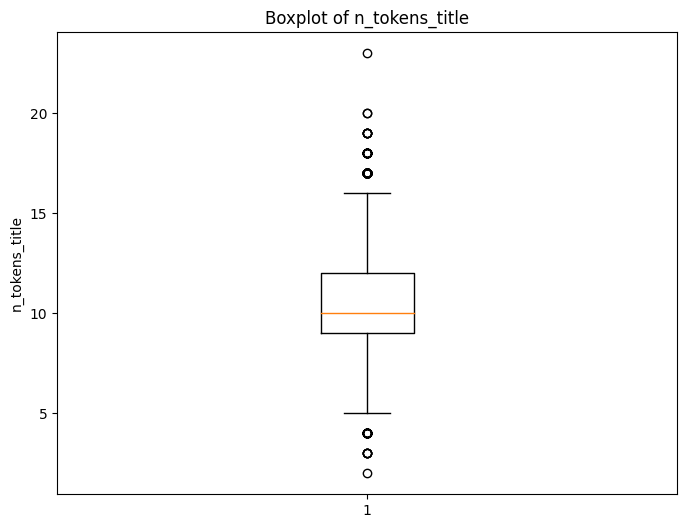

In [ ]:
# @title
# Plotting the boxplots of some variables in the dataset
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.boxplot(news_df['n_tokens_title'])
plt.title('Boxplot of n_tokens_title')
plt.ylabel('n_tokens_title')
plt.show()

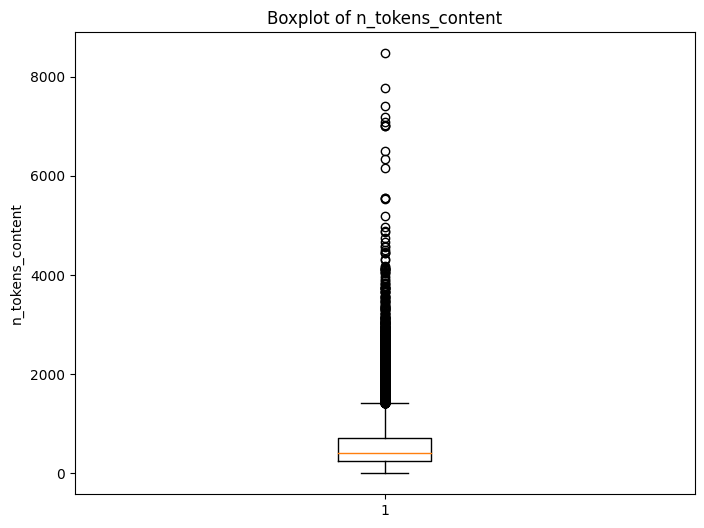

In [ ]:
# @title
plt.figure(figsize=(8, 6))
plt.boxplot(news_df['n_tokens_content'])
plt.title('Boxplot of n_tokens_content')
plt.ylabel('n_tokens_content')
plt.show()

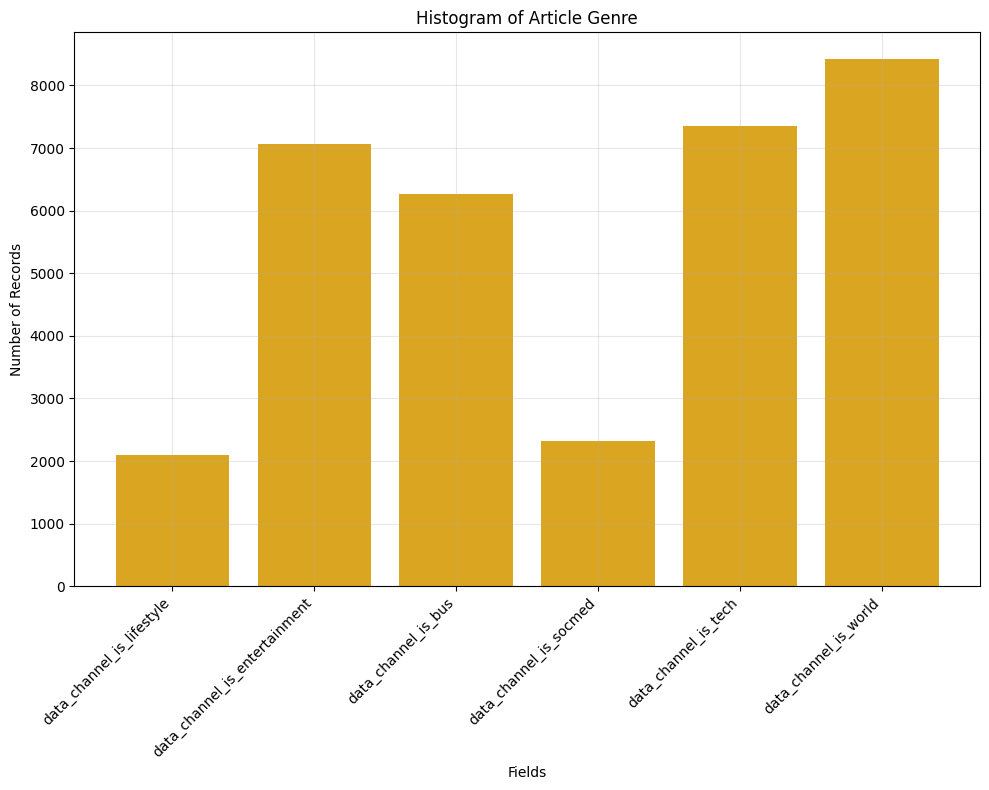

In [ ]:
# @title
# Define the fields
fields = ['data_channel_is_lifestyle', 'data_channel_is_entertainment',
          'data_channel_is_bus', 'data_channel_is_socmed',
          'data_channel_is_tech', 'data_channel_is_world']

# Count the number of records with value 1.0 in each field
counts = [news_df[field].sum() for field in fields]

# Create a histogram
plt.figure(figsize=(10, 8))
plt.bar(fields, counts, color='goldenrod')

# Customize the plot
plt.title('Histogram of Article Genre')
plt.xlabel('Fields')
plt.ylabel('Number of Records')

# Show the plot
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True, alpha = 0.3)
plt.show()

<Figure size 1000x2000 with 0 Axes>

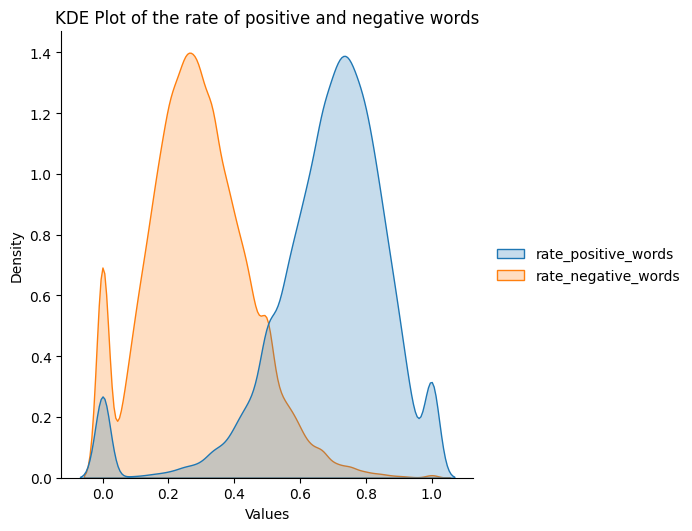

In [ ]:
# @title
# Plotting the distribution of the rates of positive and negative words
import seaborn as sns

# Extract the variables
variables = ['rate_positive_words', 'rate_negative_words']
data_subset = news_df[variables]

# Create a KDE plot with displot
plt.figure(figsize=(10, 20))
sns.displot(data=data_subset, kind='kde', fill=True)

# Customize the plot
plt.title('KDE Plot of the rate of positive and negative words')
plt.xlabel('Values')
plt.ylabel('Density')

# Show the plot
plt.show()

<Axes: >

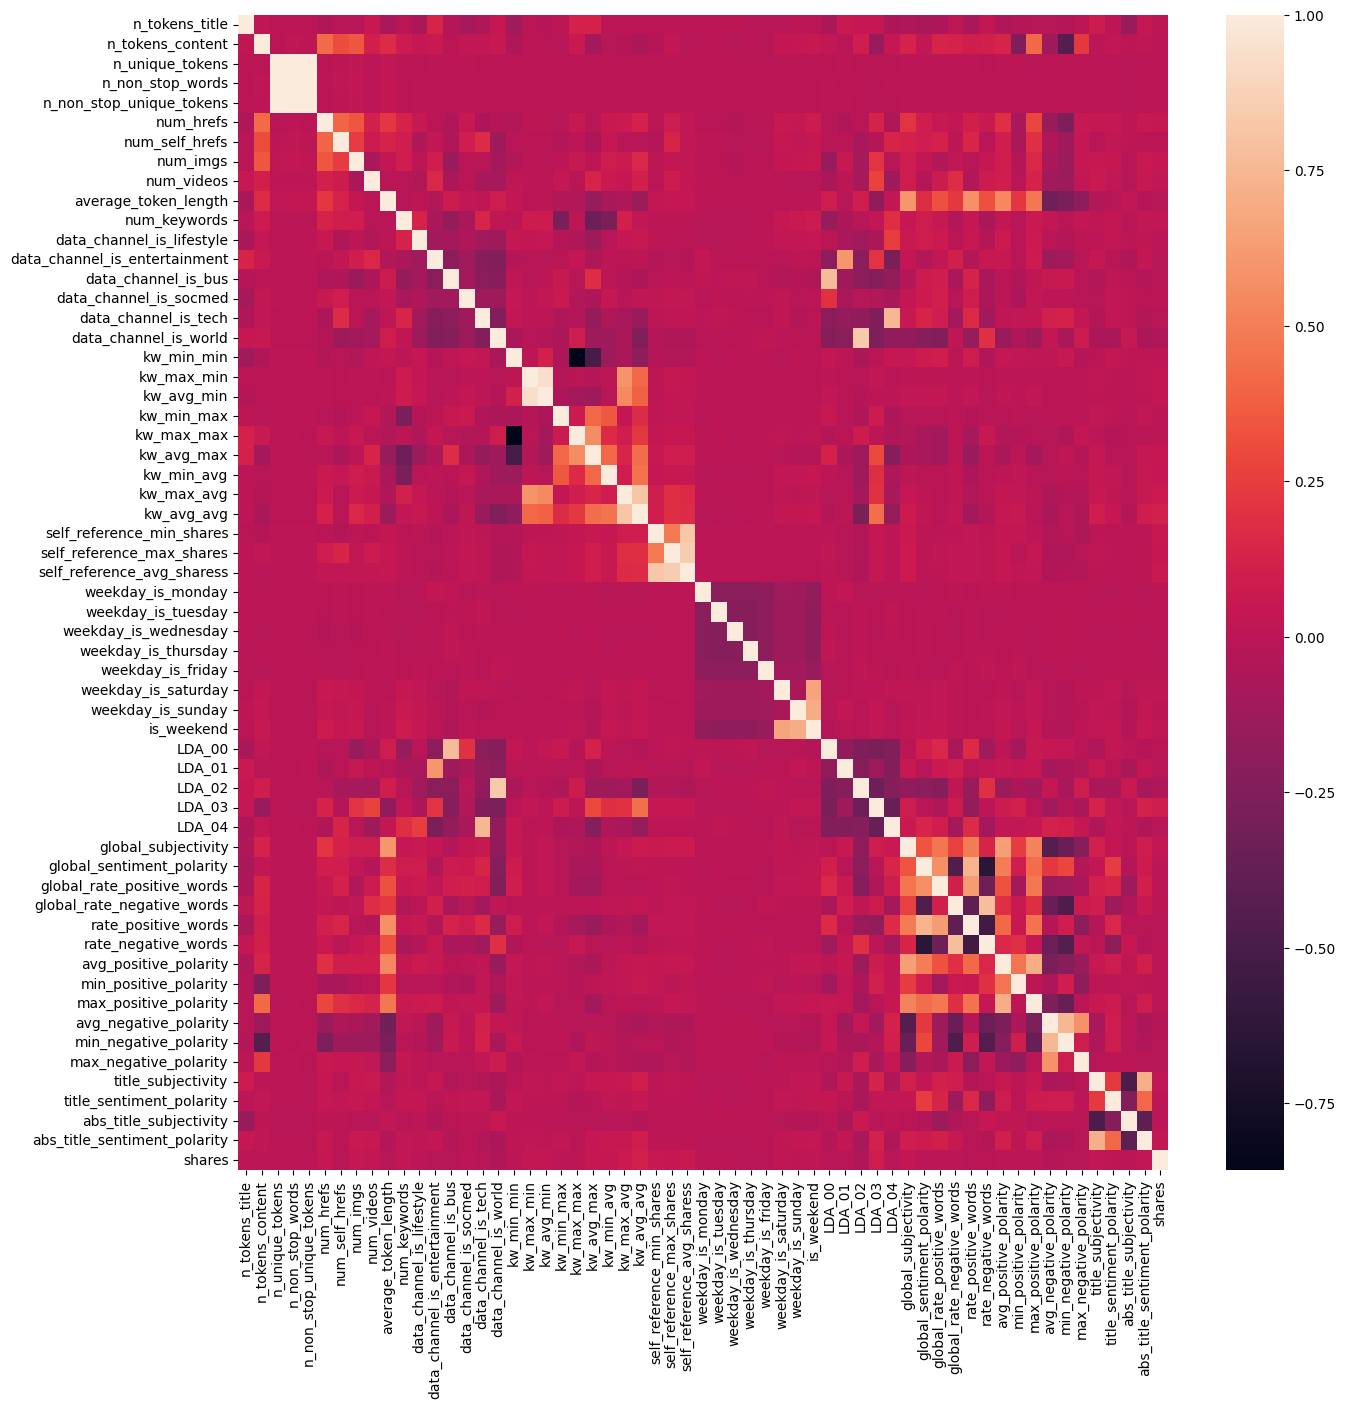

In [ ]:
# @title
# Creating the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 15))
corr_mat = news_df.corr()
sns.heatmap(corr_mat)

### KMeans Clustering : Classification Problem Introduction

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import make_scorer, silhouette_score

# Apply KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42, n_init = 'auto')
news_df['cluster'] = kmeans.fit_predict(news_df)

# Assign binary labels based on cluster assignments
news_df['binary_shares'] = (news_df['cluster']).astype(int)

# Drop the 'cluster' column if no longer needed
news_df.drop('cluster', axis=1, inplace=True)

news_df.head()


,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,binary_shares
0,12,219,0.663594,1.0,0.815385,4,2,1,0,4.680365,...,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,9,255,0.604743,1.0,0.791946,3,1,1,0,4.913725,...,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,9,211,0.575130,1.0,0.663866,3,1,1,0,4.393365,...,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,0
3,9,531,0.503788,1.0,0.665635,9,0,1,0,4.404896,...,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,13,1072,0.415646,1.0,0.540890,19,19,20,0,4.682836,...,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0


In [ ]:
# Predict cluster labels
cluster_labels = kmeans.labels_

# Calculate silhouette score
silhouette_avg = silhouette_score(news_df, cluster_labels)

print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.7885317307236859


In [ ]:
news_df.sample(20)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,binary_shares
5786,13,327,0.606811,1.0,0.793478,9,6,1,0,4.584098,...,0.7,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,3000,1
14534,7,1723,0.387981,1.0,0.569017,34,12,1,0,4.537435,...,1.0,-0.318234,-1.000000,-0.071429,0.400000,0.100000,0.100000,0.100000,7400,1
39062,12,1383,0.412333,1.0,0.588820,10,0,1,0,4.686913,...,1.0,-0.237755,-0.700000,-0.025000,0.000000,0.000000,0.500000,0.000000,768,1
17654,15,483,0.528908,1.0,0.706960,4,1,0,1,4.685300,...,1.0,-0.191667,-0.200000,-0.166667,0.540000,0.160000,0.040000,0.160000,806,1
14435,9,234,0.632479,1.0,0.755102,3,1,1,0,5.123932,...,0.2,-0.177778,-0.333333,-0.100000,0.200000,0.200000,0.300000,0.200000,2800,1
14356,13,1368,0.465324,1.0,0.632629,22,9,12,3,4.489035,...,0.6,-0.326454,-1.000000,-0.050000,0.454545,0.136364,0.045455,0.136364,576,1
23540,15,430,0.527711,1.0,0.656371,10,6,1,1,4.446512,...,0.8,-0.208333,-0.433333,-0.050000,0.600000,0.200000,0.100000,0.200000,1300,1
17939,9,359,0.580645,1.0,0.696970,30,2,14,1,4.685237,...,1.0,-0.409936,-0.800000,-0.050000,0.000000,0.000000,0.500000,0.000000,9200,1
2271,6,123,0.804878,1.0,0.902778,2,1,1,0,4.723577,...,0.7,-0.177778,-0.200000,-0.155556,0.000000,0.000000,0.500000,0.000000,2200,0
24005,13,175,0.676301,1.0,0.875000,9,4,1,0,4.245714,...,0.7,-0.353472,-0.800000,-0.050000,0.227273,0.018182,0.272727,0.018182,2700,1


In [ ]:
news_df[news_df['binary_shares'] == 0].mean()['shares']

3128.77369742624

In [ ]:
news_df[news_df['binary_shares'] == 1].mean()['shares']

3418.6784519172747

In [ ]:
news_df['binary_shares'].value_counts()

1    36458
0     3186
Name: binary_shares, dtype: int64

In [ ]:
news_df.drop(columns = ['shares'], inplace=True)

In [ ]:
# @title
# Result after imputation
news_df.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,binary_shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,0.919635
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,0.271861
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,1.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,1.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,1.000000


### Feature Selection & Extraction

In [ ]:
# @title
# Dropping columns based on the correlation matrix

# Create a DataFrame from the correlation matrix, stack it to get pairings, and reset index for easier manipulation
high_corr_pairs = corr_mat.where(np.triu(np.ones(corr_mat.shape), k=1).astype(bool))
high_corr_pairs = high_corr_pairs.stack().reset_index()
high_corr_pairs.columns = ['Variable1', 'Variable2', 'Correlation']

# Filter pairs with positive correlation above 0.9
high_corr_pairs = high_corr_pairs.loc[(high_corr_pairs['Correlation'] > 0.9) | (high_corr_pairs['Correlation'] < -0.9)]

print(high_corr_pairs)

columns_to_drop = high_corr_pairs['Variable2']


            Variable1                 Variable2  Correlation
115   n_unique_tokens          n_non_stop_words     0.999572
116   n_unique_tokens  n_non_stop_unique_tokens     0.999852
171  n_non_stop_words  n_non_stop_unique_tokens     0.999532
891        kw_max_min                kw_avg_min     0.940529


In [ ]:
# @title
# Dropping one of the predicitor variables that have high correlation with other predictor variables
news_df.drop(columns=columns_to_drop,inplace=True)

In [ ]:
# @title
# Observing modified dataset with removed variables
news_df.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,binary_shares
0,12,219,0.663594,4,2,1,0,4.680365,5,0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,0
1,9,255,0.604743,3,1,1,0,4.913725,4,0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,0
2,9,211,0.575130,3,1,1,0,4.393365,6,0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,0
3,9,531,0.503788,9,0,1,0,4.404896,7,0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,0
4,13,1072,0.415646,19,19,20,0,4.682836,7,0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,0


### Feature Selection : Recursive Feature Elimination (RFE)

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# Separate features and target variable
X = news_df.drop(columns=['binary_shares'])  # Features
y = news_df['binary_shares']  # Target variable

# Standardize the features (if necessary)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Apply RFE
rfe = RFE(estimator=LogisticRegression())

rfe.fit(X_train, y_train)

# Get the selected features
selected_features = list(X.columns[rfe.support_])
print("Number of features:", len(selected_features))
print("Selected Features:\n", selected_features)


Number of features: 27
Selected Features:
 ['n_tokens_content', 'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos', 'num_keywords', 'data_channel_is_entertainment', 'data_channel_is_tech', 'data_channel_is_world', 'kw_min_min', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg', 'self_reference_min_shares', 'weekday_is_tuesday', 'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday', 'LDA_02', 'LDA_03', 'global_subjectivity', 'global_sentiment_polarity', 'min_positive_polarity', 'min_negative_polarity']


In [ ]:
# @title
selected_features.append('binary_shares')
reduced_dataset = news_df[selected_features]

reduced_dataset.to_csv('/content/drive/MyDrive/IE 7275/IE 7275 - Project/extracted_dataset.csv', index = False)

## CLASSIFICATION PROBLEM MODEL IMPLEMENTATION

In [2]:
# @title
import pandas as pd

# Split the data into features and the target variable
reduced_dataset = pd.read_csv('/content/drive/MyDrive/IE 7275/IE 7275 - Project/extracted_dataset.csv')


In [11]:
# @title
from sklearn.metrics import precision_score, recall_score, f1_score
# Defining the Summary Table

summary_table = pd.DataFrame()
summary_table['Model Name'] = ['kNN Classifier', 'Random Forest Classifier', 'Logistic Regression', 'Decision Trees']
accuracy = list()
precision = list()
recall = list()
f1score = list()
rmse_list = list()
rse_list = list()
roc_list = list()
auc_list = list()
cv_score = list()
train_errors = list()
test_errors = list()

## kNN Classifier

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, precision_score, recall_score, f1_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

X = reduced_dataset.drop('binary_shares', axis=1)
y = reduced_dataset['binary_shares']

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize and train kNN classifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
knn_pred = knn_classifier.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)
knn_rmse = mean_squared_error(y_test, knn_pred, squared=False)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_f1 = f1_score(y_test, knn_pred)
knn_r2 = r2_score(y_test, knn_pred)

# Display the metrics
print("kNN Classifier Metrics:")
print("Accuracy:", knn_accuracy)
print("RMSE:", knn_rmse)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)
print("R-squared Score:", knn_r2)

accuracy.append(knn_accuracy)
rmse_list.append(knn_rmse)
precision.append(knn_precision)
recall.append(knn_recall)
f1score.append(knn_f1)
rse_list.append(knn_r2)

cv_scores = cross_val_score(knn_classifier, X, y, cv=5)
# Print average score and standard deviation
print(f"Model: {type(knn_classifier).__name__}")
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

cv_score.append(cv_scores.mean())

y_test_knn = y_test

y_train_pred = knn_classifier.predict(X_train)

# Calculate training and testing errors
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, knn_pred)

train_errors.append(train_error)
test_errors.append(test_error)


kNN Classifier Metrics:
Accuracy: 0.9989910455290705
RMSE: 0.03176404368038646
Precision: 0.9993111049875999
Recall: 0.9995865490628445
F1 Score: 0.9994488080474025
R-squared Score: 0.9870103913592645
Model: KNeighborsClassifier
Cross-validation scores: [0.8576113  0.99974776 0.99886493 0.9993694  0.99760343]
Mean CV score: 0.9706393644452234
Standard deviation of CV scores: 0.05651867021886813


## Random Forest

In [13]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import StandardScaler

X = reduced_dataset.drop('binary_shares', axis=1)
y = reduced_dataset['binary_shares']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize and train random forest classifier
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_pred = random_forest.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_pred)
random_forest_rmse = mean_squared_error(y_test, random_forest_pred, squared=False)
random_forest_precision = precision_score(y_test, random_forest_pred)
random_forest_recall = recall_score(y_test, random_forest_pred)
random_forest_f1 = f1_score(y_test, random_forest_pred)
random_forest_r2 = r2_score(y_test, random_forest_pred)

print("Random Forest Classifier Metrics:")
print("Accuracy:", random_forest_accuracy)
print("RMSE:", random_forest_rmse)
print("Precision:", random_forest_precision)
print("Recall:", random_forest_recall)
print("F1 Score:", random_forest_f1)
print("R-squared Score:", random_forest_r2)

accuracy.append(random_forest_accuracy)
rmse_list.append(random_forest_rmse)
precision.append(random_forest_precision)
recall.append(random_forest_recall)
f1score.append(random_forest_f1)
rse_list.append(random_forest_r2)


cv_scores = cross_val_score(random_forest, X, y, cv=5)
# Print average score and standard deviation
print(f"Model: {type(random_forest).__name__}")
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())

cv_score.append(cv_scores.mean())

y_test_rand = y_test

y_train_pred = random_forest.predict(X_train)

# Calculate training and testing errors
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, random_forest_pred)

train_errors.append(train_error)
test_errors.append(test_error)

Random Forest Classifier Metrics:
Accuracy: 0.9998738806911338
RMSE: 0.011230285342153484
Precision: 1.0
Recall: 0.9998621830209482
F1 Score: 0.9999310867617669
R-squared Score: 0.9983762989199081
Model: RandomForestClassifier
Cross-validation scores: [0.97969479 1.         0.99987388 1.         0.99861251]
Mean CV score: 0.9956362369154398
Standard deviation of CV scores: 0.00798787064870758


### Logistic Regression

In [14]:
from sklearn.linear_model import LogisticRegression

X = reduced_dataset.drop('binary_shares', axis=1)
y = reduced_dataset['binary_shares']

# Standardizing the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize and train logistic regression model
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)
logistic_pred = logistic_reg.predict(X_test)
logistic_accuracy = accuracy_score(y_test, logistic_pred)
logistic_rmse = mean_squared_error(y_test, logistic_pred, squared=False)
logistic_precision = precision_score(y_test, logistic_pred)
logistic_recall = recall_score(y_test, logistic_pred)
logistic_f1 = f1_score(y_test, logistic_pred)
logistic_r2 = r2_score(y_test, logistic_pred)

print("Logistic Regression Metrics:")
print("Accuracy:", logistic_accuracy)
print("RMSE:", logistic_rmse)
print("Precision:", logistic_precision)
print("Recall:", logistic_recall)
print("F1 Score:", logistic_f1)
print("R-squared Score:", logistic_r2)

accuracy.append(logistic_accuracy)
rmse_list.append(logistic_rmse)
precision.append(logistic_precision)
recall.append(logistic_recall)
f1score.append(logistic_f1)
rse_list.append(logistic_r2)

cv_scores = cross_val_score(logistic_reg, X, y, cv=5)
# Print average score and standard deviation
print(f"Model: {type(logistic_reg).__name__}")
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())
cv_score.append(cv_scores.mean())

y_test_log = y_test

y_train_pred = knn_classifier.predict(X_train)

# Calculate training and testing errors
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, logistic_pred)

train_errors.append(train_error)
test_errors.append(test_error)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Metrics:
Accuracy: 0.9986126876024719
RMSE: 0.03724664276855112
Precision: 0.9987608426270136
Recall: 0.9997243660418964
F1 Score: 0.9992423720641918
R-squared Score: 0.9821392881189887
Model: LogisticRegression
Cross-validation scores: [0.95901122 1.         1.         1.         0.99873865]
Mean CV score: 0.9915499744897927
Standard deviation of CV scores: 0.016276707658219765


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


### Decision Trees

In [15]:
from sklearn.tree import DecisionTreeClassifier

X = reduced_dataset.drop('binary_shares', axis=1)
y = reduced_dataset['binary_shares']

X_Train, X_Test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Initialize and train decision tree classifier
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)
decision_tree_pred = decision_tree.predict(X_test)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_pred)
decision_tree_rmse = mean_squared_error(y_test, decision_tree_pred, squared=False)
decision_tree_precision = precision_score(y_test, decision_tree_pred)
decision_tree_recall = recall_score(y_test, decision_tree_pred)
decision_tree_f1 = f1_score(y_test, decision_tree_pred)
decision_tree_r2 = r2_score(y_test, decision_tree_pred)

print("Decision Tree Classifier Metrics:")
print("Accuracy:", decision_tree_accuracy)
print("RMSE:", decision_tree_rmse)
print("Precision:", decision_tree_precision)
print("Recall:", decision_tree_recall)
print("F1 Score:", decision_tree_f1)
print("R-squared Score:", decision_tree_r2)

accuracy.append(decision_tree_accuracy)
rmse_list.append(decision_tree_rmse)
precision.append(decision_tree_precision)
recall.append(decision_tree_recall)
f1score.append(decision_tree_f1)
rse_list.append(decision_tree_r2)

cv_scores = cross_val_score(decision_tree, X, y, cv=5)
# Print average score and standard deviation
print(f"Model: {type(decision_tree).__name__}")
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())
print("Standard deviation of CV scores:", cv_scores.std())
cv_score.append(cv_scores.mean())

y_test_dt = y_test

y_train_pred = knn_classifier.predict(X_train)

# Calculate training and testing errors
train_error = mean_squared_error(y_train, y_train_pred)
test_error = mean_squared_error(y_test, decision_tree_pred)

train_errors.append(train_error)
test_errors.append(test_error)

Decision Tree Classifier Metrics:
Accuracy: 0.9998738806911338
RMSE: 0.011230285342153484
Precision: 1.0
Recall: 0.9998621830209482
F1 Score: 0.9999310867617669
R-squared Score: 0.9983762989199081
Model: DecisionTreeClassifier
Cross-validation scores: [1.         1.         0.99987388 1.         0.99861251]
Mean CV score: 0.999697278660931
Standard deviation of CV scores: 0.0005445780535546702


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


### Model Evaluation
#### Confusion Matrix

In [ ]:
# @title
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

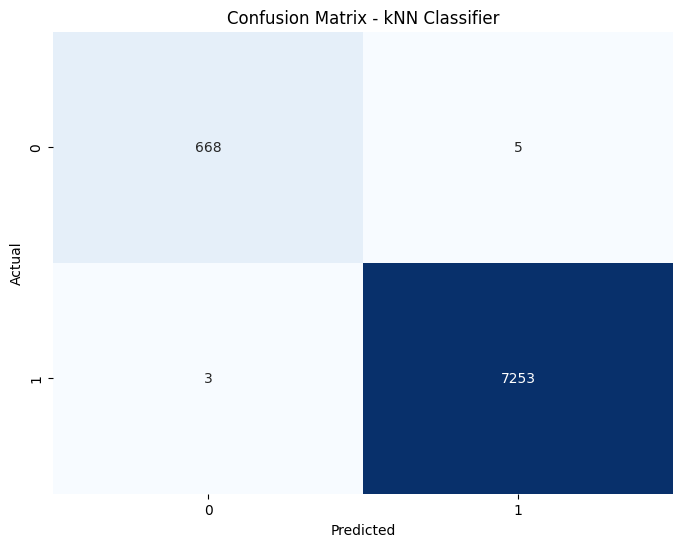

In [ ]:
# @title
# For kNN
plot_confusion_matrix(y_test_knn, knn_pred, title='Confusion Matrix - kNN Classifier')

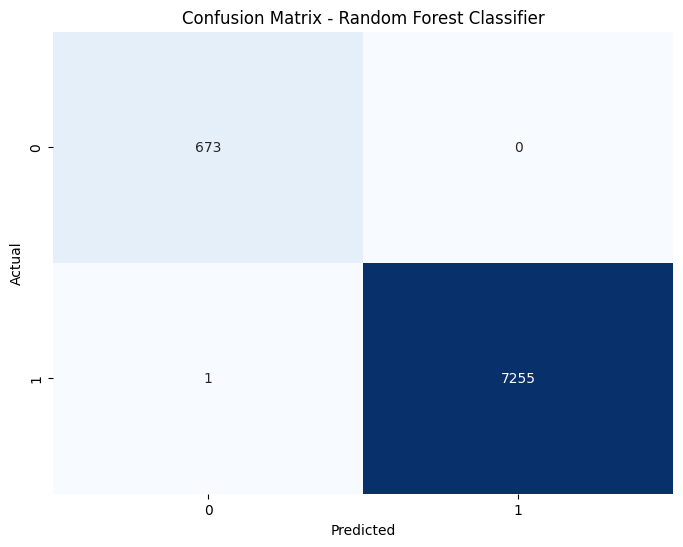

In [ ]:
# @title
# For Random Forest Classifier
plot_confusion_matrix(y_test_rand, random_forest_pred, title='Confusion Matrix - Random Forest Classifier')

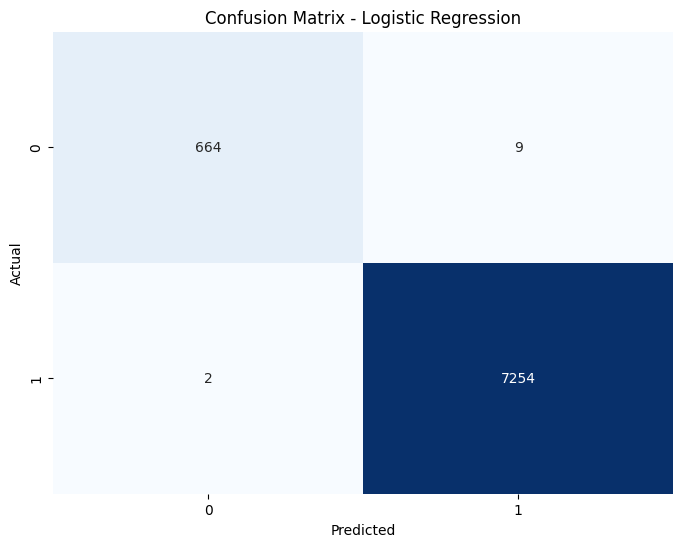

In [ ]:
# @title
# For Logistic Regression
plot_confusion_matrix(y_test_log, logistic_pred, title='Confusion Matrix - Logistic Regression')

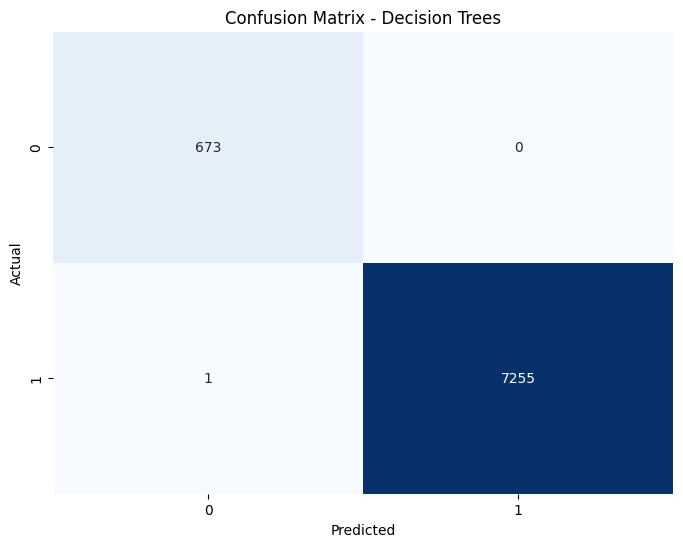

In [ ]:
# @title
# For Decision Trees
plot_confusion_matrix(y_test_dt, decision_tree_pred, title='Confusion Matrix - Decision Trees')

### ROC Curves

In [ ]:
# @title
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curve(y_test, y_pred, title):
    # Compute false positive rate (FPR) and true positive rate (TPR)
    fpr, tpr, _ = roc_curve(y_test, y_pred)

    # Compute Area Under the Curve (AUC)
    roc_auc = auc(fpr, tpr)
    auc_list.append(roc_auc)

    # Plot ROC curve
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve for ' + title)
    plt.legend(loc="lower right")
    plt.show()



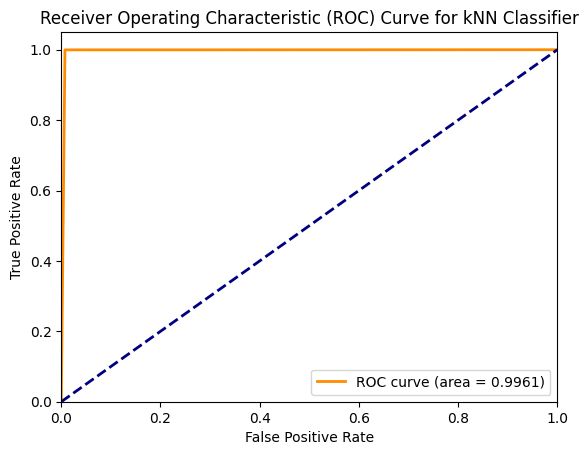

In [ ]:
# @title
# For kNN
plot_roc_curve(y_test_knn, knn_pred, title='kNN Classifier')

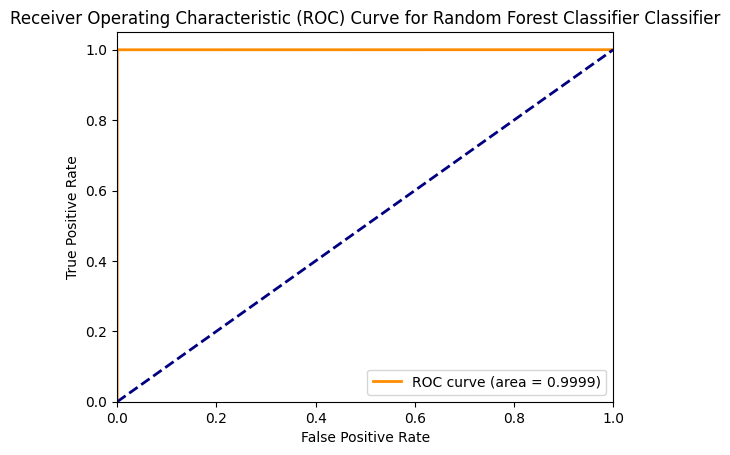

In [ ]:
# @title
# For Random Forest Classifier
plot_roc_curve(y_test_rand, random_forest_pred, title='Random Forest Classifier Classifier')

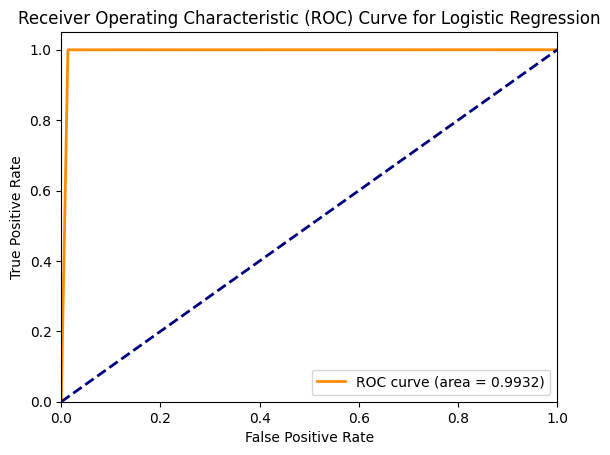

In [ ]:
# @title
# For Logistic Regression
plot_roc_curve(y_test_log, logistic_pred, title='Logistic Regression')

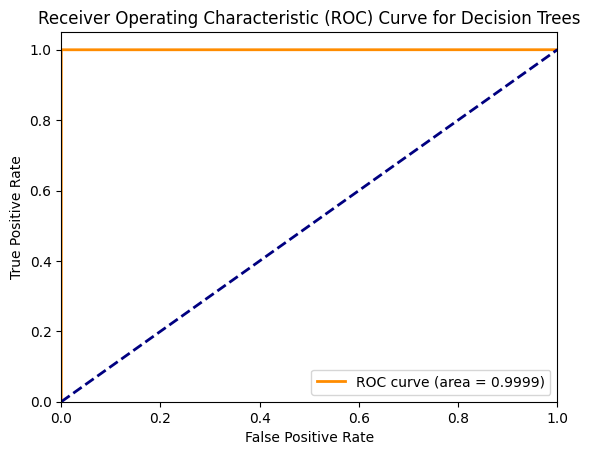

In [ ]:
# @title
# For Decision Trees
plot_roc_curve(y_test_dt, decision_tree_pred, title='Decision Trees')

In [20]:
# Training and testing error

error_df = pd.DataFrame()
error_df['Model Name'] = ['kNN Classifier', 'Random Forest Classifier', 'Logistic Regression', 'Decision Trees']
error_df['Training Error'] = [round(x,5) for x in train_errors]
error_df['Testing Error'] = [round(x,5) for x in test_errors]
error_df

,Model Name,Training Error,Testing Error
0,kNN Classifier,0.00041,0.00101
1,Random Forest Classifier,0.00000,0.00013
2,Logistic Regression,0.07924,0.00139
3,Decision Trees,0.07924,0.00013


In [ ]:
# @title
# Printing Summary of each Model
summary_table['Accuracy'] = accuracy
summary_table['Precision'] = precision
summary_table['Recall'] = recall
summary_table['F1 Score'] = f1score
summary_table['RMSE'] = rmse_list
summary_table['R2 Score Value'] = rse_list
summary_table['AUC'] = auc_list
summary_table['Mean CV Score'] = cv_score

summary_table

,Model Name,Accuracy,Precision,Recall,F1 Score,RMSE,R2 Score Value,AUC,Mean CV Score
0,kNN Classifier,0.998991,0.999311,0.999587,0.999449,0.031764,0.987010,0.996079,0.970639
1,Random Forest Classifier,0.999874,1.000000,0.999862,0.999931,0.011230,0.998376,0.999931,0.997906
2,Logistic Regression,0.998613,0.998761,0.999724,0.999242,0.037247,0.982139,0.993176,0.991550
3,Decision Trees,0.999874,1.000000,0.999862,0.999931,0.011230,0.998376,0.999931,0.999697
